# Modeling Burned Area by Forest Fires

We will be now proceding with our goal of projecting the area burned by forest fires considering strongly relevant meterological components. Ideally we can identify a model which can accuratly portray our forest fires data and the parameters that can considerably have greater impact in the areas that are devastated by forest fires. We would like to understand in which stance this region is found and how it can be further impacted by the changing of matereological matters which have been of increasing concern due to climate change.

Our next step then will be to test out models.

We will be starting by importating our needed packages and libraries.

In [1574]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [1575]:
# Loading the data
datafile = pd.read_csv('../data/processed/processed_fires.csv')

# Checking our data tyes and the size of our dataframe
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DMC        480 non-null    float64
 1   DC         480 non-null    float64
 2   ISI        480 non-null    float64
 3   temp       480 non-null    float64
 4   RH         480 non-null    float64
 5   wind       480 non-null    float64
 6   rain       480 non-null    float64
 7   area       480 non-null    float64
 8   month_apr  480 non-null    bool   
 9   month_aug  480 non-null    bool   
 10  month_dec  480 non-null    bool   
 11  month_feb  480 non-null    bool   
 12  month_jan  480 non-null    bool   
 13  month_jul  480 non-null    bool   
 14  month_jun  480 non-null    bool   
 15  month_mar  480 non-null    bool   
 16  month_may  480 non-null    bool   
 17  month_nov  480 non-null    bool   
 18  month_oct  480 non-null    bool   
 19  month_sep  480 non-null    bool   
dtypes: bool(12

In [1576]:
datafile.head()

,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.082381,0.101325,0.211712,0.029787,0.480000,0.700000,0.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False
1,0.114226,0.775419,0.283784,0.446809,0.240000,0.055556,0.0,0.0,False,False,False,False,False,False,False,False,False,False,True,False
2,0.142956,0.796294,0.283784,0.302128,0.240000,0.100000,0.0,0.0,False,False,False,False,False,False,False,False,False,False,True,False
3,0.286951,0.563035,0.644144,0.625532,0.186667,0.555556,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False
4,0.299412,0.571948,0.364865,0.706383,0.160000,0.300000,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False


In [1577]:
datafile = datafile.dropna()

In [1578]:

x = datafile.drop("area", axis= 1)
y = datafile["area"]

In [1579]:
reg = LinearRegression()

In [1580]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Create and train a Linear Regression model
reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.007966913038833642
R-squared: 0.0727092559706205


Our current linear modeling demonstrates a low R-Squared of  0.07270925597061983  and Mean Squared Error: 321.6791204203084 leading us to considere a revaluation of the model. Before we anihilate the possibility of using linear regression to predict the areas burned we can perhaps try a regularization of the model.

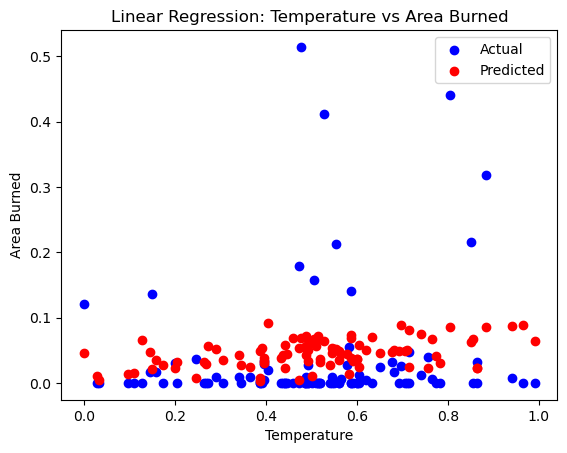

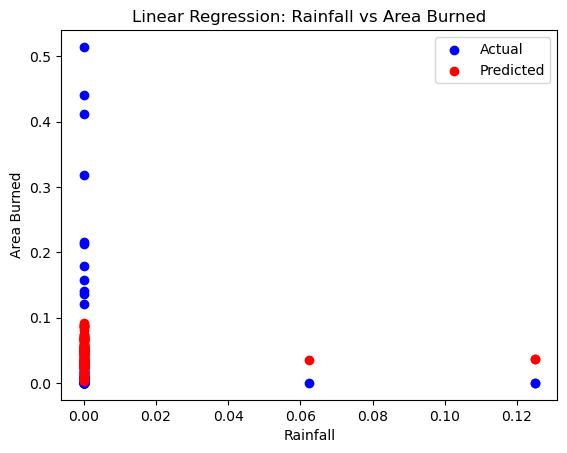

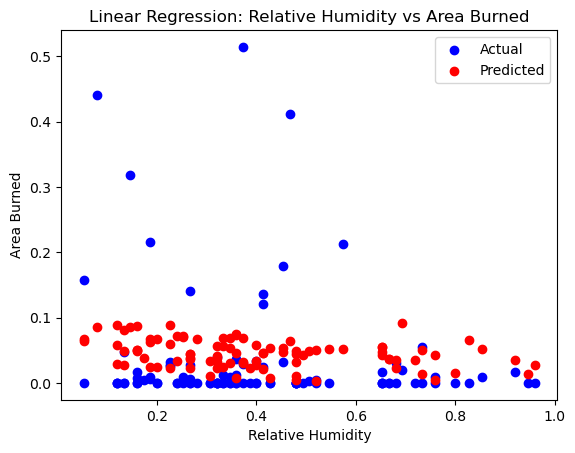

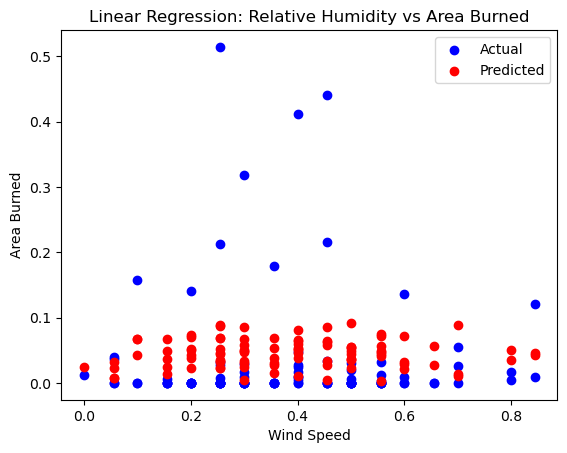

In [1581]:


plt.scatter(x_test['temp'], y_test, label='Actual', color='blue')
plt.scatter(x_test['temp'], y_pred, label='Predicted', color='red')
plt.xlabel('Temperature')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Temperature vs Area Burned')
plt.show()

plt.scatter(x_test['rain'], y_test, label='Actual', color='blue')
plt.scatter(x_test['rain'], y_pred, label='Predicted', color='red')
plt.xlabel('Rainfall')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Rainfall vs Area Burned')
plt.show()

plt.scatter(x_test['RH'], y_test, label='Actual', color='blue')
plt.scatter(x_test['RH'], y_pred, label='Predicted', color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Relative Humidity vs Area Burned')
plt.show()

plt.scatter(x_test['wind'], y_test, label='Actual', color='blue')
plt.scatter(x_test['wind'], y_pred, label='Predicted', color='red')
plt.xlabel('Wind Speed')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Relative Humidity vs Area Burned')
plt.show()

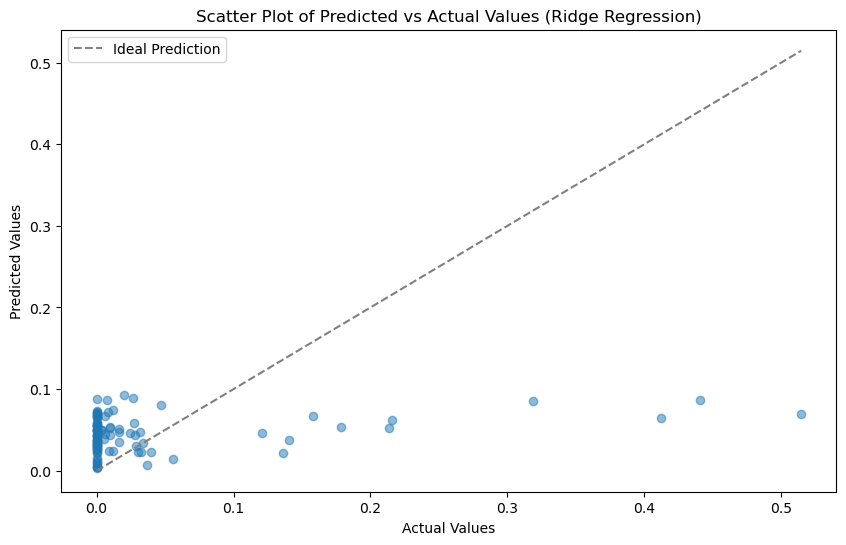

In [1582]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Ideal Prediction')
plt.title('Scatter Plot of Predicted vs Actual Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [1583]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming your features are stored in X and the target variable in y

# Create a linear regression model
model = LinearRegression()


num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

cv_scores = -cv_scores


print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)



Cross-validation scores: [8.33745172e-03 7.71957812e-03 2.64403525e-03 2.34453338e-03
 2.27884054e-02 2.27773201e-02 4.03935267e+23 2.36958827e-02
 7.61675474e-03 1.04140607e-02]
Mean CV Score: 4.03935266654198e+22
Standard Deviation of CV Scores: 1.2118057999625939e+23
